# **LAPTOP PRICE PREDICTION MODEL**

### **IMPORT LIBRARIES AND READING IN DATA**

Before building our price prediction model, we need to import several essential libraries:

*   NumPy: Supports array and matrix operations, complementing Pandas for numerical computations.
*   Pandas: Enables the creation of DataFrames and facilitates loading CSV data for analysis.
*   Matplotlib: Provides a variety of plotting tools (e.g., histograms, heatmaps, bar graphs, box plots) for data visualization.
*   Seaborn: Enhances Matplotlib's functionality with a more intuitive and aesthetically pleasing interface for statistical visualization.
*   IPyWidgets: Introduces interactive elements like buttons and sliders to enhance the Jupyter Notebook experience.
*   SciPy: Assists in building our supervised machine learning model, specifically Linear Regression.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from scipy import stats
from IPython.display import display
%matplotlib inline

The first thing you have to do in order for this note book to run successfully is uploading the laptop_price.csv file. This can be done by clicking the folder icon in the left pane.Then click on the upload to session storage icon. Once the csv dataset file is uploaded using the pandas library, we will read in our CSV file containing the dataset. This data is in its raw, uncleaned form.

In [ ]:
path="/content/laptop_price.csv" #update file path as needed
CSV = pd.read_csv(path, encoding='latin-1')
sns.set_palette("GnBu_d")
sns.set_style("whitegrid")

### **DATA EXPLORATION**

We will examine key details of the dataset to gain valuable insights that will be useful to know.

In [ ]:
CSV

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_dollars
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


A preview of the dataset loaded from the CSV file tells us that we are dealing with 1,303 rows and 13 columns of data.

We will use .info() to inspect the DataFrame, identifying NULL values and displaying each column's data type.

In [ ]:
CSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_dollars     1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


We will use .describe() to generate key mathematical information for each numeric column, excluding object-type columns.

In [ ]:
CSV.describe()

,laptop_ID,Inches,Price_dollars
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


Let's display the maximum and minimum values for each column.

In [ ]:
print("Maximum Values:\n\n",CSV.max())

Maximum Values:

 laptop_ID                                    1320
Company                                    Xiaomi
Product                    Zenbook UX510UW-FI095T
TypeName                              Workstation
Inches                                       18.4
ScreenResolution            Touchscreen 2560x1440
Cpu                 Samsung Cortex A72&A53 2.0GHz
Ram                                           8GB
Memory                                    8GB SSD
Gpu                           Nvidia Quadro M620M
OpSys                                       macOS
Weight                                        4kg
Price_dollars                              6099.0
dtype: object


In [ ]:
print("Minimum Values:\n\n",CSV.min())

Minimum Values:

 laptop_ID                                           1
Company                                          Acer
Product             110-15ACL (A6-7310/4GB/500GB/W10)
TypeName                           2 in 1 Convertible
Inches                                           10.1
ScreenResolution                             1366x768
Cpu                       AMD A10-Series 9600P 2.4GHz
Ram                                              12GB
Memory                                      1.0TB HDD
Gpu                                AMD FirePro W4190M
OpSys                                         Android
Weight                                         0.69kg
Price_dollars                                   174.0
dtype: object


Since the data is in its raw state and some columns are of type 'object' rather than numerical, the max and min values may not be accurate for all columns.

### **DATA CLEANING**

Now that we have an understanding of the data, we need to clean it to enhance readability for both the end user and the ML model.

First, we will eliminate any potential duplicate rows to ensure data consistency.

In [ ]:
CSV.drop_duplicates(inplace=True)

In [ ]:
CSV

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_dollars
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


The number of rows remains unchanged, indicating that no duplicate rows were found or removed.

Next, let's remove the 'ID' and 'product' columns as they do not contribute to our laptop price prediction based on key hardware specifications. For better readability, we'll also move the 'price' column to the front of the DataFrame.

In [ ]:
CSV.drop("laptop_ID", axis = 1,inplace=True)
CSV.drop("Product", axis = 1,inplace=True)
first_column = CSV.pop("Price_dollars")
CSV.insert(0,"Price_dollars",first_column)

In [ ]:
CSV

,Price_dollars,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1339.69,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,898.94,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
2,575.00,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg
3,2537.45,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg
4,1803.60,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg
...,...,...,...,...,...,...,...,...,...,...,...
1298,638.00,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg
1299,1499.00,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg
1300,229.00,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg
1301,764.00,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg


Since we are using a supervised regression algorithm, we need to convert object-type columns into numeric format. We will go column by column cleaning up and converting them.

This one-hot encodes the Company, TypeName, and OpSys columns by creating separate binary columns for each unique value in these categories, then removes the original columns from the dataset.

In [ ]:
#Company
CSV = CSV.join(pd.get_dummies(CSV.Company))
CSV = CSV.drop("Company", axis=1)

In [ ]:
#TypeName
CSV = CSV.join(pd.get_dummies(CSV.TypeName))
CSV = CSV.drop("TypeName", axis=1)

In [ ]:
#OpSys
CSV = CSV.join(pd.get_dummies(CSV.OpSys))
CSV = CSV.drop("OpSys", axis=1)

This series of transformations extracts key features from multiple columns and applies one-hot encoding where necessary. These transformations ensure that categorical variables are converted into numerical representations suitable for machine learning models while preserving essential information.

In [ ]:
#ScreenResoluton
CSV["ScreenResolution"] = CSV.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
CSV["Screen Width"] = CSV.ScreenResolution.str.split("x").apply(lambda x: x[0])
CSV["Screen Height"] = CSV.ScreenResolution.str.split("x").apply(lambda x: x[1])
CSV = CSV.drop("ScreenResolution", axis=1)
CSV["Screen Width"] = CSV["Screen Width"].astype("int")
CSV["Screen Height"] = CSV["Screen Height"].astype("int")

In [ ]:
#Cpu
CSV["CPU Brand"] = CSV.Cpu.str.split(" ").apply(lambda x: x[0])
CSV["CPU Frequency"] = CSV.Cpu.str.split(" ").apply(lambda x: x[-1])
CSV = CSV.drop("Cpu", axis=1)
CSV["CPU Frequency"] = CSV["CPU Frequency"].str[:-3]
CSV["CPU Frequency"] = CSV["CPU Frequency"].astype("float")
cpu_categories = pd.get_dummies(CSV["CPU Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]
CSV = CSV.join(cpu_categories)
CSV = CSV.drop("CPU Brand", axis=1)


In [ ]:
#Memory
CSV["Memory Amount"] = CSV.Memory.str.split(" ").apply(lambda x: x[0])
CSV["Memory Type"] = CSV.Memory.str.split(" ").apply(lambda x: x[1])
def turn_memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000
CSV["Memory Amount"] = CSV["Memory Amount"].apply(turn_memory_into_MB)
CSV = CSV.drop("Memory", axis=1)
CSV = CSV.drop("Memory Type", axis=1)

In [ ]:
#Gpu
CSV["GPU Brand"] = CSV.Gpu.str.split(" ").apply(lambda x: x[0])
CSV = CSV.drop("Gpu", axis=1)
gpu_categories = pd.get_dummies(CSV["GPU Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]
CSV = CSV.join(gpu_categories)
CSV = CSV.drop("GPU Brand", axis=1)

This converts the Ram and Weight columns into numerical values by removing their unit suffixes (GB for RAM and kg for weight) and changing their data types to integers and floats, respectively.

In [ ]:
#Ram
CSV["Ram"] = CSV["Ram"].str[:-2]
CSV["Ram"] = CSV["Ram"].astype("int")

In [ ]:
#Weight
CSV["Weight"] = CSV["Weight"].str[:-2]
CSV["Weight"] = CSV["Weight"].astype("float")

### **DATA VISUALIZATION**

Now that the data is cleaner, let's start visualizing the data to explore its relationships. Let's begin by examining the cleaned columns.

In [ ]:
target_correlations = CSV.corr()['Price_dollars'].apply(abs).sort_values()

In [ ]:
target_correlations

,Price_dollars
Xiaomi,0.000776
Asus,0.010376
Mac OS X,0.015656
Huawei,0.016851
Windows 10 S,0.018312
ARM_GPU,0.018431
Samsung_CPU,0.018431
Fujitsu,0.027135
Lenovo,0.029007
Samsung,0.034584


In [ ]:
selected_features = list(target_correlations.index[1:])

Let's visualize the distribution of laptop prices.

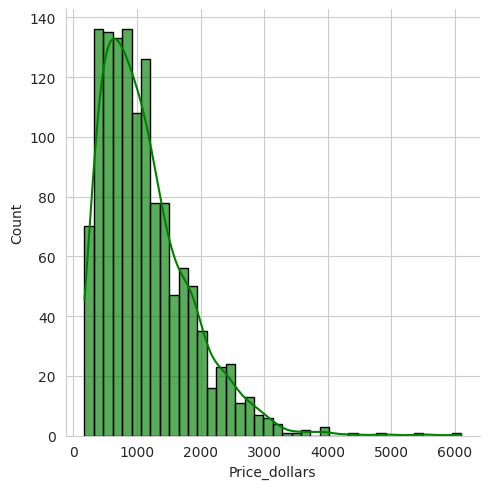

In [ ]:
sns.displot(data = CSV, x = "Price_dollars", color='g', bins=40, kde=True, linewidth = 1, edgecolor = "black", alpha = 0.65, legend=True)


As the histogram shows, most laptops are priced between $500 - $1,500.

Let's examine the average laptop prices by brand.

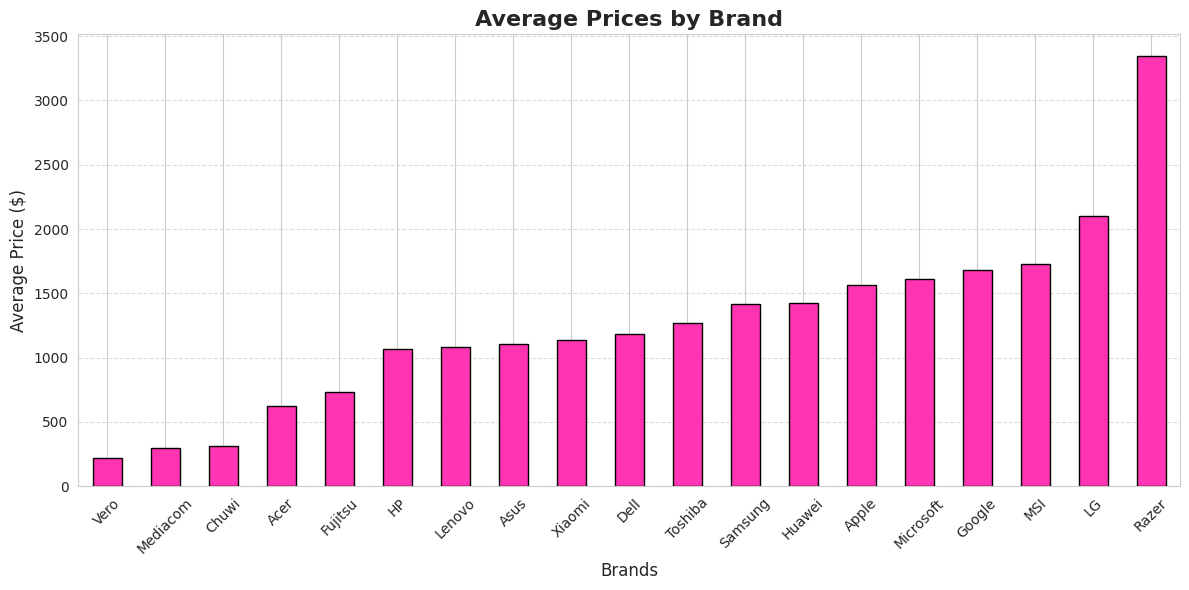

In [ ]:
# Define the list of computer brands from the slecte features list
computer_brands = [
    "Xiaomi", "Asus", "Huawei", "Fujitsu", "Lenovo",
    "Samsung", "Google", "Toshiba", "HP", "Microsoft",
    "Dell", "Chuwi", "LG", "Vero", "Apple",
    "Mediacom", "MSI", "Acer", "Razer"
]

# Ensure the brand columns exist in the modified dataset
brand_columns = [brand for brand in computer_brands if brand in CSV.columns]

# Compute total price per brand (sum of prices for each brand)
total_price_per_brand = CSV[brand_columns].mul(CSV['Price_dollars'], axis=0).sum()

# Compute total number of laptops per brand (count of occurrences)
total_laptops_per_brand = CSV[brand_columns].sum()

# Compute the average price per brand
average_prices = total_price_per_brand / total_laptops_per_brand

# Sort values for better visualization
average_prices = average_prices.sort_values()

# Plot the bar graph
plt.figure(figsize=(12, 6))
average_prices.plot(kind='bar', color='#ff34b3', edgecolor='black')

# Titles and labels
plt.title('Average Prices by Brand', fontsize=16, fontweight='bold')
plt.xlabel('Brands', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

As the bar graph shows, Razer and LG laptops tend to fall on the higher end of the price range.

Let's examine the average laptop prices by CPU brand.

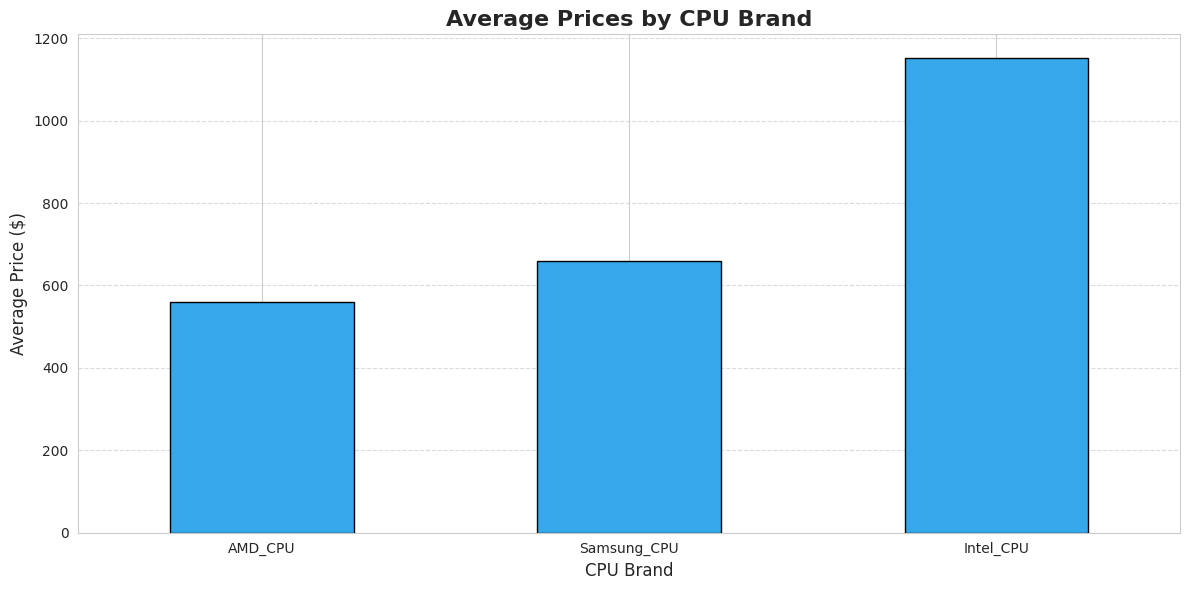

In [ ]:
# Define the list of CPU brands
cpu_list = ["Samsung_CPU", "AMD_CPU", "Intel_CPU"]

# Ensure the CPU columns exist in the modified dataset
cpu_columns = [cpu for cpu in cpu_list if cpu in CSV.columns]

# Compute total price per CPU brand (sum of prices for each CPU type)
total_price_per_cpu = CSV[cpu_columns].mul(CSV['Price_dollars'], axis=0).sum()

# Compute total number of laptops per CPU brand (count of occurrences)
total_laptops_per_cpu = CSV[cpu_columns].sum()

# Compute the average price per CPU brand
average_prices_cpu = total_price_per_cpu / total_laptops_per_cpu

# Sort values for better visualization
average_prices_cpu = average_prices_cpu.sort_values()

# Plot the bar graph
plt.figure(figsize=(12, 6))
average_prices_cpu.plot(kind='bar', color='#34a8eb', edgecolor='black')

# Titles and labels
plt.title('Average Prices by CPU Brand', fontsize=16, fontweight='bold')
plt.xlabel('CPU Brand', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)  # No rotation needed for few labels
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

As the bar graph shows Intel CPU's point towrads a higher price.

Finally, Lets look at how ram sizes relate to price

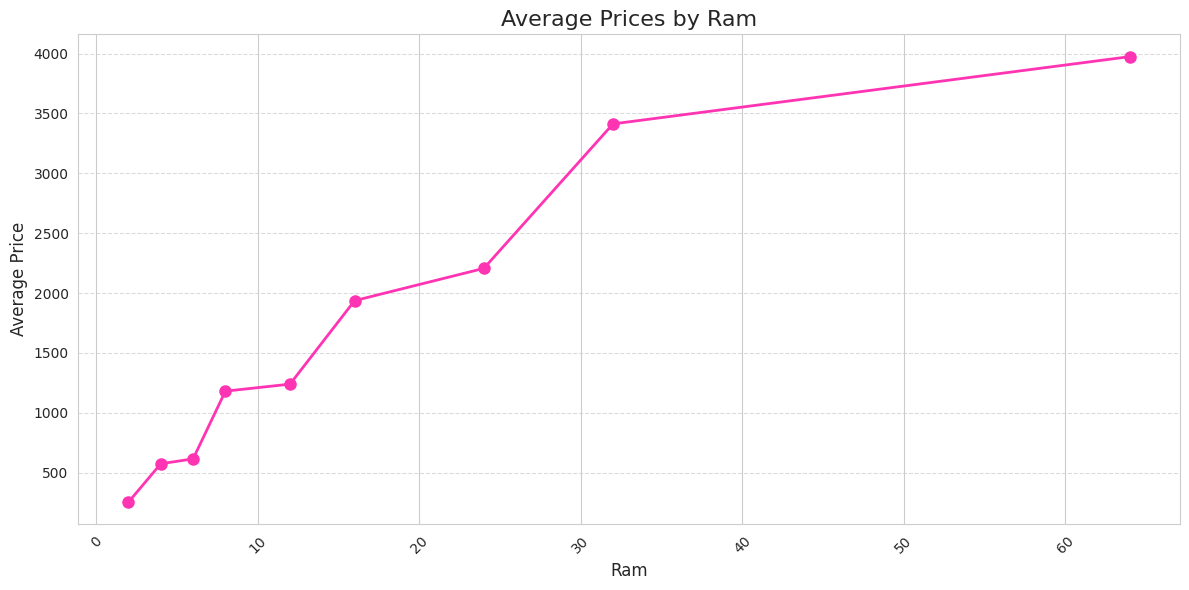

In [ ]:
average_prices = CSV.groupby('Ram')['Price_dollars'].mean().sort_values()

plt.figure(figsize=(12, 6))
average_prices.plot(kind='line', marker='o', color='#ff34b3', linestyle='-', linewidth=2, markersize=8)
#average_prices.plot(kind='bar', color='#ff34b3', edgecolor='black')

plt.title('Average Prices by Ram', fontsize=16)
plt.xlabel('Ram', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Based on the line graph the larger the ram size the higher the price.

### **CREATING THE LAPTOP PRICE PREDICTION MODEL**

In [ ]:
CSV.columns

Index(['Price_dollars', 'Inches', 'Ram', 'Weight', 'Acer', 'Apple', 'Asus',
       'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG', 'Lenovo',
       'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Vero',
       'Xiaomi', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Android', 'Chrome OS', 'Linux', 'Mac OS X',
       'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7', 'macOS',
       'Screen Width', 'Screen Height', 'CPU Frequency', 'AMD_CPU',
       'Intel_CPU', 'Samsung_CPU', 'Memory Amount', 'AMD_GPU', 'ARM_GPU',
       'Intel_GPU', 'Nvidia_GPU'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Define categorical feature lists
computer_brands = [
    "Xiaomi", "Asus", "Huawei", "Fujitsu", "Lenovo",
    "Samsung", "Google", "Toshiba", "HP", "Microsoft",
    "Dell", "Chuwi", "LG", "Vero", "Apple",
    "Mediacom", "MSI", "Acer", "Razer"
]

cpu_list = ["Samsung_CPU", "AMD_CPU", "Intel_CPU"]
operating_systems = [
    "Mac OS X", "Windows 10 S", "Windows 10",
    "Windows 7", "macOS", "Chrome OS",
    "Linux", "No OS", "Android"
]

gpu_list = ["ARM_GPU", "Intel_GPU", "AMD_GPU", "Nvidia_GPU"]
device_types = ["Netbook", "2 in 1 Convertible", "Workstation", "Ultrabook", "Gaming", "Notebook"]

# Ensure training and prediction use the SAME features
all_features = [
    "Memory Amount", "CPU Frequency", "Ram", "Inches",
    "Screen Height", "Screen Width", "Weight"
] + computer_brands + cpu_list + operating_systems + gpu_list + device_types

# Prepare dataset
y = CSV["Price_dollars"]
X = CSV[all_features]  # Ensure consistency in feature selection

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Train Linear Regression Model
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

Now that our Linear Regression model is created and trained, let's obtain its prediction results and compare them to the actual values.

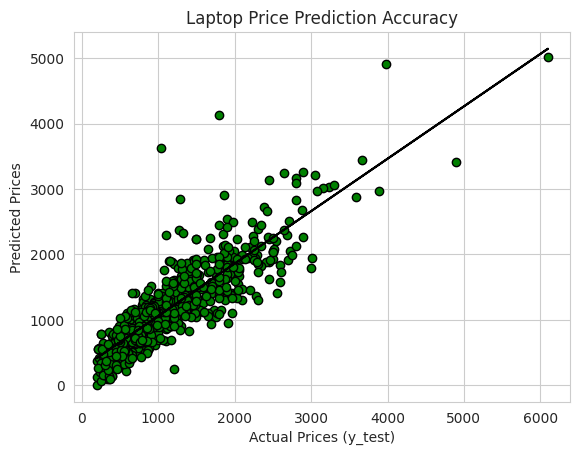

In [ ]:
LR_model_prediction = LR_model.predict(X_test)
plt.scatter(x=y_test, y=LR_model_prediction, color="g", edgecolor="black")
a, b = np.polyfit(y_test, LR_model_prediction, 1)
plt.plot(y_test, a * y_test + b, color="black")
plt.xlabel("Actual Prices (y_test)")
plt.ylabel("Predicted Prices")
plt.title("Laptop Price Prediction Accuracy")
plt.show()

What we have is a scatter plot, where the closer the points are to the line, the more accurate the predictions. As you can see, my laptop price prediction model performs exceptionally well.

### **USER INTERFACE**

To use the laptop price prediction user interface, simply run the cell below, adjust the sliders and dropdowns to match the specifications of the laptop you want to evaluate. Select values for memory (MB), CPU frequency (GHz), RAM (GB), screen size (inches), resolution (height & width), and weight (KG) using the provided sliders. Choose a computer brand, CPU brand, operating system, GPU brand, and device type from the dropdown menus. Once all selections are made, click the "Predict Price" button, and the estimated laptop price will be displayed below.

In [ ]:
# Create UI Widgets for Prediction
memory_amount = widgets.IntSlider(min=1000, max=64000, step=1000, description="Memory (MB)")
cpu_frequency = widgets.FloatSlider(min=1.0, max=5.0, step=0.1, description="CPU (GHz)")
ram = widgets.IntSlider(min=2, max=64, step=2, description="RAM (GB)")
inches = widgets.FloatSlider(min=10.0, max=20.0, step=0.1, description="Screen Size")
screen_height = widgets.IntSlider(min=600, max=4000, step=100, description="Height (px)")
screen_width = widgets.IntSlider(min=800, max=8000, step=100, description="Width (px)")
weight = widgets.FloatSlider(min=0.5, max=5.0, step=0.1, description="Weight (KG)")

computer_brand = widgets.Dropdown(options=computer_brands, description="Brand")
cpu_brand = widgets.Dropdown(options=cpu_list, description="CPU Brand")
operating_system = widgets.Dropdown(options=operating_systems, description="OS")
gpu_brand = widgets.Dropdown(options=gpu_list, description="GPU Brand")
device_type = widgets.Dropdown(options=device_types, description="Device Type")

predict_button = widgets.Button(description="Predict Price")
output = widgets.Output()

# Function to Predict Laptop Price
def predict_laptop_price(b):
    with output:
        output.clear_output()

        # Prepare input dictionary with default values
        input_data = {feature: 0 for feature in all_features}

        # Set numeric values
        input_data["Memory Amount"] = memory_amount.value
        input_data["CPU Frequency"] = cpu_frequency.value
        input_data["Ram"] = ram.value
        input_data["Inches"] = inches.value
        input_data["Screen Height"] = screen_height.value
        input_data["Screen Width"] = screen_width.value
        input_data["Weight"] = weight.value

        # Set one-hot encoded values
        input_data[computer_brand.value] = 1
        input_data[cpu_brand.value] = 1
        input_data[operating_system.value] = 1
        input_data[gpu_brand.value] = 1
        input_data[device_type.value] = 1

        # Convert to DataFrame and ensure column order matches training
        input_df = pd.DataFrame([input_data])[all_features]

        # Make Prediction
        predicted_price = LR_model.predict(input_df)[0]

        # Display Result
        print(f"Estimated Laptop Price: ${predicted_price:,.2f}")

# Attach Function to Button
predict_button.on_click(predict_laptop_price)

# Display UI
display(
    memory_amount, cpu_frequency, ram, inches,
    screen_height, screen_width, weight,
    computer_brand, cpu_brand, operating_system,
    gpu_brand, device_type, predict_button, output
)

IntSlider(value=1000, description='Memory (MB)', max=64000, min=1000, step=1000)

FloatSlider(value=1.0, description='CPU (GHz)', max=5.0, min=1.0)

IntSlider(value=2, description='RAM (GB)', max=64, min=2, step=2)

FloatSlider(value=10.0, description='Screen Size', max=20.0, min=10.0)

IntSlider(value=600, description='Height (px)', max=4000, min=600, step=100)

IntSlider(value=800, description='Width (px)', max=8000, min=800, step=100)

FloatSlider(value=0.5, description='Weight (KG)', max=5.0, min=0.5)

Dropdown(description='Brand', options=('Xiaomi', 'Asus', 'Huawei', 'Fujitsu', 'Lenovo', 'Samsung', 'Google', '…

Dropdown(description='CPU Brand', options=('Samsung_CPU', 'AMD_CPU', 'Intel_CPU'), value='Samsung_CPU')

Dropdown(description='OS', options=('Mac OS X', 'Windows 10 S', 'Windows 10', 'Windows 7', 'macOS', 'Chrome OS…

Dropdown(description='GPU Brand', options=('ARM_GPU', 'Intel_GPU', 'AMD_GPU', 'Nvidia_GPU'), value='ARM_GPU')

Dropdown(description='Device Type', options=('Netbook', '2 in 1 Convertible', 'Workstation', 'Ultrabook', 'Gam…

Button(description='Predict Price', style=ButtonStyle())

Output()